In [1]:
#v1b0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
print(device_lib.list_local_devices())
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
image_size = (224, 224)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)


Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14425597219389418560
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2585902041761505085
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0


In [2]:
IMG_SIZE=224
NUM_CLASSES=2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")
    model.trainable = False
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']   

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [3]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
tf.keras.optimizers.Adam(learning_rate=1e-4),
tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']   

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [4]:
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b0best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 92s 273ms/step - loss: 0.3034 - accuracy: 0.8725 - val_loss: 0.2666 - val_accuracy: 0.8909
Epoch 2/40
174/174 [==============================] - 52s 294ms/step - loss: 0.1908 - accuracy: 0.9270 - val_loss: 0.2357 - val_accuracy: 0.9129
Epoch 3/40
174/174 [==============================] - 52s 298ms/step - loss: 0.1525 - accuracy: 0.9410 - val_loss: 0.1037 - val_accuracy: 0.9577
Epoch 4/40
174/174 [==============================] - 51s 294ms/step - loss: 0.1070 - accuracy: 0.9616 - val_loss: 0.1120 - val_accuracy: 0.9594
Epoch 5/40
174/174 [==============================] - 48s 273ms/step - loss: 0.0913 - accuracy: 0.9661 - val_loss: 0.1053 - val_accuracy: 0.9577
Epoch 6/40
174/174 [==============================] - 51s 292ms/step - loss: 0.0839 - accuracy: 0.9670 - val_loss: 0.0825 - val_accuracy: 0.9729
Epoch 7/40
174/174 [==============================] - 53s 301ms/step - loss: 0.0658 - accuracy: 0.9751 - val_loss: 0.0753 - val_ac

{'loss': [0.30343854427337646, 0.19083374738693237, 0.15252208709716797, 0.10702435672283173, 0.09133658558130264, 0.08387626707553864, 0.0657920390367508, 0.06545012444257736, 0.05585281923413277, 0.049600567668676376, 0.0538233257830143, 0.050871800631284714, 0.036758143454790115, 0.03634532541036606, 0.028691528365015984, 0.03347393497824669, 0.030330715700984, 0.02610331028699875, 0.018951302394270897, 0.035004884004592896, 0.026515334844589233, 0.03376001864671707, 0.017118725925683975, 0.026702476665377617, 0.027570713311433792, 0.02757316827774048, 0.020773695781826973, 0.012057510204613209, 0.023914270102977753, 0.030617130920290947, 0.024923650547862053, 0.017489494755864143, 0.01686028577387333, 0.03008871152997017, 0.011740791611373425, 0.008638801984488964, 0.018732693046331406, 0.011110489256680012, 0.00942208431661129, 0.03743855655193329], 'accuracy': [0.8724977374076843, 0.9269612431526184, 0.9410279393196106, 0.9615870118141174, 0.9660955667495728, 0.9669972658157349, 

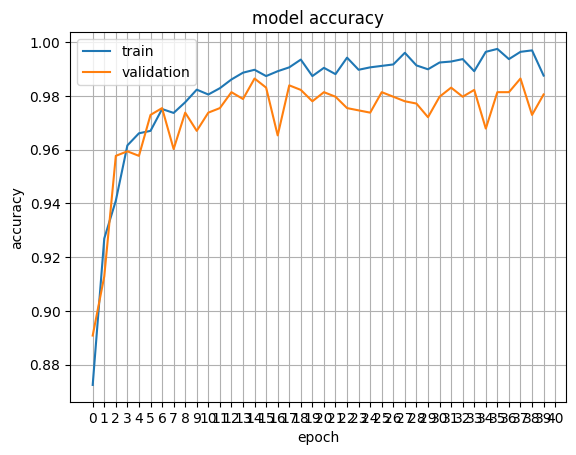

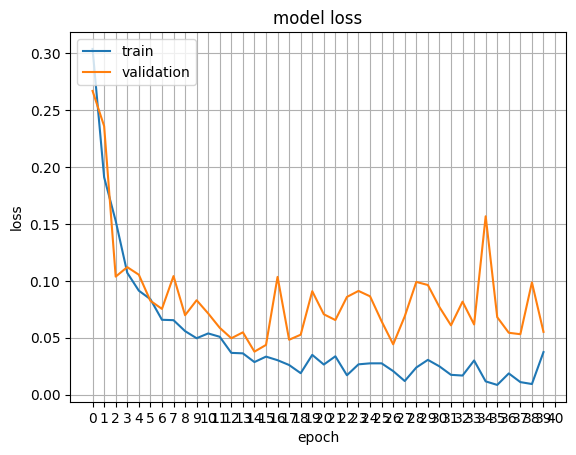

In [5]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

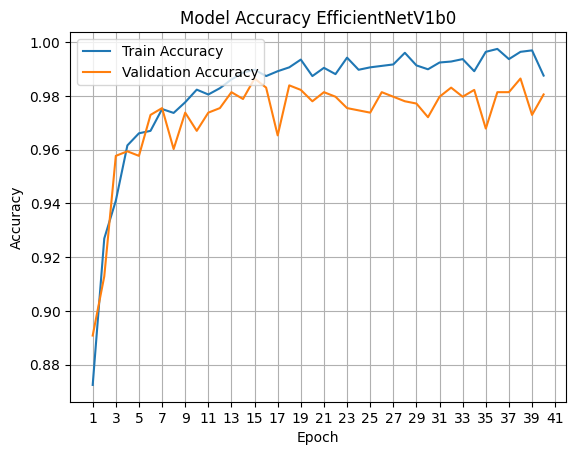

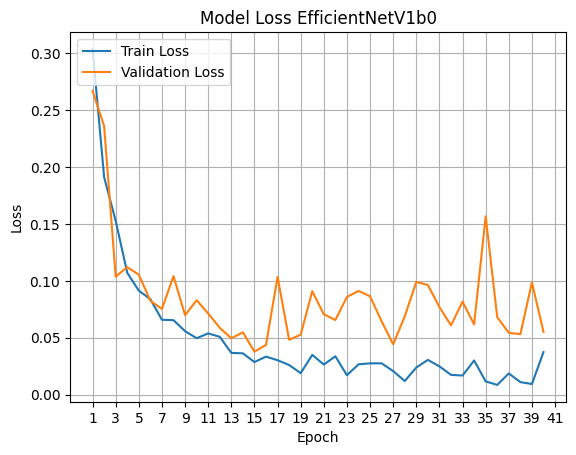

In [1]:
hist={'loss': [0.30343854427337646, 0.19083374738693237, 0.15252208709716797, 0.10702435672283173, 0.09133658558130264, 0.08387626707553864, 0.0657920390367508, 0.06545012444257736, 0.05585281923413277, 0.049600567668676376, 0.0538233257830143, 0.050871800631284714, 0.036758143454790115, 0.03634532541036606, 0.028691528365015984, 0.03347393497824669, 0.030330715700984, 0.02610331028699875, 0.018951302394270897, 0.035004884004592896, 0.026515334844589233, 0.03376001864671707, 0.017118725925683975, 0.026702476665377617, 0.027570713311433792, 0.02757316827774048, 0.020773695781826973, 0.012057510204613209, 0.023914270102977753, 0.030617130920290947, 0.024923650547862053, 0.017489494755864143, 0.01686028577387333, 0.03008871152997017, 0.011740791611373425, 0.008638801984488964, 0.018732693046331406, 0.011110489256680012, 0.00942208431661129, 0.03743855655193329], 'accuracy': [0.8724977374076843, 0.9269612431526184, 0.9410279393196106, 0.9615870118141174, 0.9660955667495728, 0.9669972658157349, 0.9751127362251282, 0.9736699461936951, 0.977637529373169, 0.9823264479637146, 0.9805229902267456, 0.982867419719696, 0.9861136078834534, 0.9886384010314941, 0.9897204637527466, 0.9873760342597961, 0.9891794323921204, 0.9906221628189087, 0.9935076832771301, 0.9873760342597961, 0.9904418587684631, 0.9880973696708679, 0.9942290186882019, 0.9897204637527466, 0.9906221628189087, 0.9911631941795349, 0.9917042255401611, 0.9960324764251709, 0.9913435578346252, 0.9899008274078369, 0.9924256205558777, 0.9927862882614136, 0.9936879873275757, 0.9891794323921204, 0.9963931441307068, 0.9974752068519592, 0.9936879873275757, 0.9963931441307068, 0.996934175491333, 0.9875563383102417], 'val_loss': [0.2665714919567108, 0.23570585250854492, 0.10366984456777573, 0.11199161410331726, 0.10533754527568817, 0.08245912939310074, 0.07534215599298477, 0.1041186973452568, 0.06978990882635117, 0.08294081687927246, 0.07135291397571564, 0.058747485280036926, 0.049571044743061066, 0.0547800287604332, 0.03783556446433067, 0.04372159019112587, 0.10343104600906372, 0.04826536029577255, 0.05269733443856239, 0.0908588394522667, 0.07062604278326035, 0.0655662789940834, 0.08582763373851776, 0.09110861271619797, 0.0863739475607872, 0.06445945799350739, 0.04424744099378586, 0.0687878429889679, 0.09900156408548355, 0.09630820900201797, 0.07695511728525162, 0.060921378433704376, 0.08168655633926392, 0.06165912747383118, 0.15659423172473907, 0.06806305795907974, 0.05439518019556999, 0.0531260222196579, 0.09856044501066208, 0.055168986320495605], 'val_accuracy': [0.8908629417419434, 0.9128595590591431, 0.9576988220214844, 0.9593908786773682, 0.9576988220214844, 0.9729272127151489, 0.9754652976989746, 0.9602369070053101, 0.9737732410430908, 0.9670050740242004, 0.9737732410430908, 0.9754652976989746, 0.9813874959945679, 0.9788494110107422, 0.9864636063575745, 0.9830795526504517, 0.9653130173683167, 0.9839255213737488, 0.9822335243225098, 0.9780033826828003, 0.9813874959945679, 0.9796954393386841, 0.9754652976989746, 0.9746192693710327, 0.9737732410430908, 0.9813874959945679, 0.9796954393386841, 0.9780033826828003, 0.9771573543548584, 0.9720812439918518, 0.9796954393386841, 0.9830795526504517, 0.9796954393386841, 0.9822335243225098, 0.9678511023521423, 0.9813874959945679, 0.9813874959945679, 0.9864636063575745, 0.9729272127151489, 0.980541467666626]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV1b0')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV1b0')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [6]:
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b0best.h5')
a=model1.evaluate(x=test_ds)
a=model1.evaluate(x=val_ds)

37/37 [==============================] - 3s 60ms/step - loss: 0.0378 - accuracy: 0.9865


In [2]:
#v1b1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB1
print(device_lib.list_local_devices())
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
image_size = (240, 240)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)

img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)

IMG_SIZE=240
NUM_CLASSES=2
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))    
    x = img_augmentation(inputs)
    model = EfficientNetB1(include_top=False, input_tensor=x, weights="imagenet")    
    model.trainable = False
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10374970675698810514
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4012053750660150240
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                

                                                                                                  
 block1b_drop (Dropout)         (None, 120, 120, 16  0           ['block1b_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block1b_add (Add)              (None, 120, 120, 16  0           ['block1b_drop[0][0]',           
                                )                                 'block1a_project_bn[0][0]']     
                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 120, 120, 96  1536        ['block1b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block2a_e

                                                                                                  
 block2c_expand_conv (Conv2D)   (None, 60, 60, 144)  3456        ['block2b_add[0][0]']            
                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 60, 60, 144)  576        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 60, 60, 144)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 60, 60, 144)  1296       ['block2c_expand_activation[0][0]
 D)       

 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 30, 30, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 30, 30, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 30, 30, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
          

 block4a_dwconv (DepthwiseConv2  (None, 15, 15, 240)  2160       ['block4a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 15, 15, 240)  960        ['block4a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 15, 15, 240)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 240)         0           ['block4a_activation[0][0]']     
 agePoolin

 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 15, 15, 480)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
          

                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 15, 15, 480)  0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 15, 15, 112)  53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_project_bn (BatchNorma  (None, 15, 15, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block5c_drop (Dropout)         (None, 15, 15, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 15, 15, 112)  0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block5d_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5c_add[0][0]']            
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block6b_expand_bn (BatchNormal  (None, 8, 8, 1152)  4608        ['block6b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6b_expand_activation (Act  (None, 8, 8, 1152)  0           ['block6b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 8, 8, 1152)  28800       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_b

 ivation)                                                                                         
                                                                                                  
 block6d_dwconv (DepthwiseConv2  (None, 8, 8, 1152)  28800       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 8, 8, 1152)  4608        ['block6d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 8, 8, 1152)  0           ['block6d_bn[0][0]']             
 )                                                                                                
          

 block7a_bn (BatchNormalization  (None, 8, 8, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7a_activation (Activation  (None, 8, 8, 1152)  0           ['block7a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
          

In [3]:
import tensorflow_addons as tfa
def unfreeze_model(model):    
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 240, 240, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 240, 240, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_1 (Normalization  (None, 240, 240, 3)  7          ['rescaling_1[0][0]'] 

                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 120, 120, 96  1536        ['block1b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 120, 120, 96  384        ['block2a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block2a_expand_activation (Act  (None, 120, 120, 96  0          ['block2a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block2a_d

 block2c_expand_activation (Act  (None, 60, 60, 144)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 60, 60, 144)  1296       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_bn (BatchNormalization  (None, 60, 60, 144)  576        ['block2c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2c_activation (Activation  (None, 60, 60, 144)  0          ['block2c_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 30, 30, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_s

 block4a_activation (Activation  (None, 15, 15, 240)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 240)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_s

 block4c_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 15, 15, 480)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 15, 15, 80)   38400       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 15, 15, 80)  320         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_d

 block5a_project_conv (Conv2D)  (None, 15, 15, 112)  53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_project_bn (BatchNorma  (None, 15, 15, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_e

 block5d_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5c_add[0][0]']            
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5d_expand_activation (Act  (None, 15, 15, 672)  0          ['block5d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5d_dwconv (DepthwiseConv2  (None, 15, 15, 672)  16800      ['block5d_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 8, 8, 1152)  28800       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 8, 8, 1152)  4608        ['block6b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6b_activation (Activation  (None, 8, 8, 1152)  0           ['block6b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6b_s

 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 8, 8, 1152)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1152)        0           ['block6d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_s

 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block7a_activation[0][0]',     
          

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b1best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 115s 352ms/step - loss: 0.3136 - accuracy: 0.8711 - val_loss: 0.1715 - val_accuracy: 0.9399
Epoch 2/40
174/174 [==============================] - 57s 327ms/step - loss: 0.1815 - accuracy: 0.9288 - val_loss: 0.1541 - val_accuracy: 0.9433
Epoch 3/40
 93/174 [===============>..............] - ETA: 25s - loss: 0.1546 - accuracy: 0.9365

{'loss': [0.33141815662384033, 0.1886439174413681, 0.13385188579559326, 0.11457709968090057, 0.1048593744635582, 0.08396168798208237, 0.06400937587022781, 0.05916908383369446, 0.05358182638883591, 0.05570584535598755, 0.04216959327459335, 0.036840323358774185, 0.04021019861102104, 0.04277510941028595, 0.03819148987531662, 0.03881225362420082, 0.03362439572811127, 0.036799024790525436, 0.02855886146426201, 0.026663318276405334, 0.02693004533648491, 0.030632074922323227, 0.05654238164424896, 0.032288599759340286, 0.03190755844116211, 0.01604447513818741, 0.023912083357572556, 0.01878725364804268, 0.01667695678770542, 0.018798021599650383, 0.02318520098924637, 0.025629542768001556, 0.015912748873233795, 0.01882384903728962, 0.022873274981975555, 0.016935963183641434, 0.018794706091284752, 0.014585915952920914, 0.021607454866170883, 0.027925139293074608], 'accuracy': [0.8642019629478455, 0.9294860363006592, 0.9522091746330261, 0.959242582321167, 0.9608656167984009, 0.9720469117164612, 0.97

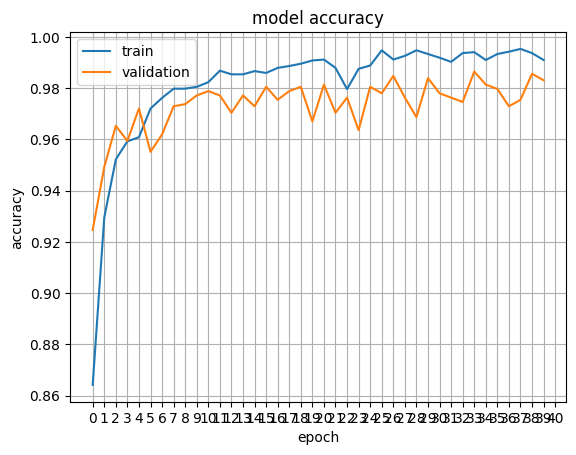

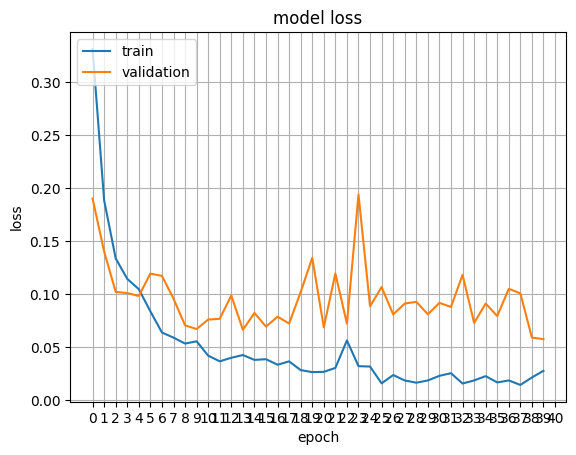

In [4]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()
plot_hist(hist)

def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

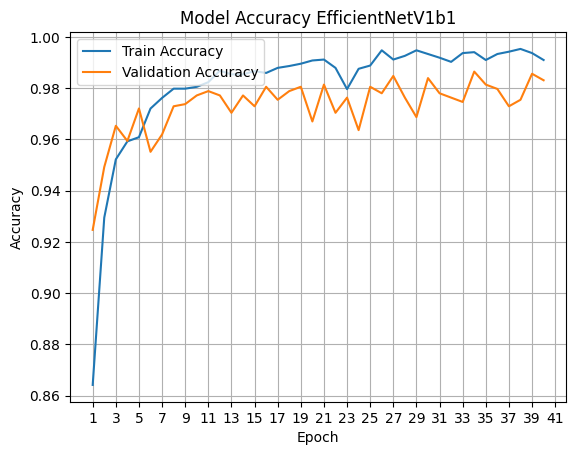

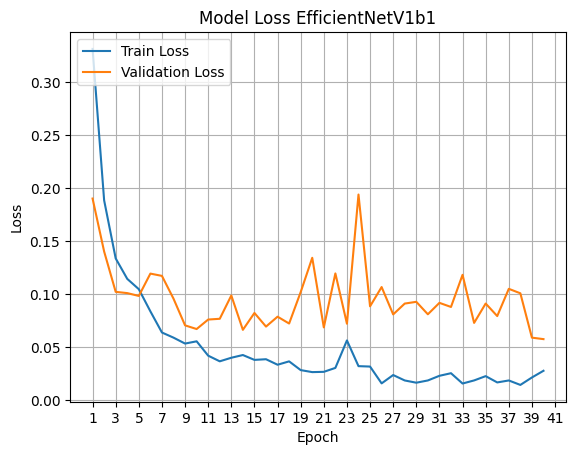

In [2]:
hist = {
    'loss': [0.33141815662384033, 0.1886439174413681, 0.13385188579559326, 0.11457709968090057, 0.1048593744635582, 0.08396168798208237, 0.06400937587022781, 0.05916908383369446, 0.05358182638883591, 0.05570584535598755, 0.04216959327459335, 0.036840323358774185, 0.04021019861102104, 0.04277510941028595, 0.03819148987531662, 0.03881225362420082, 0.03362439572811127, 0.036799024790525436, 0.02855886146426201, 0.026663318276405334, 0.02693004533648491, 0.030632074922323227, 0.05654238164424896, 0.032288599759340286, 0.03190755844116211, 0.01604447513818741, 0.023912083357572556, 0.01878725364804268, 0.01667695678770542, 0.018798021599650383, 0.02318520098924637, 0.025629542768001556, 0.015912748873233795, 0.01882384903728962, 0.022873274981975555, 0.016935963183641434, 0.018794706091284752, 0.014585915952920914, 0.021607454866170883, 0.027925139293074608],
    'accuracy': [0.8642019629478455, 0.9294860363006592, 0.9522091746330261, 0.959242582321167, 0.9608656167984009, 0.9720469117164612, 0.9761947989463806, 0.979801595211029, 0.979801595211029, 0.9805229902267456, 0.9823264479637146, 0.9868350028991699, 0.9853922724723816, 0.9853922724723816, 0.9866546392440796, 0.985933244228363, 0.9879170656204224, 0.9886384010314941, 0.9895401000976562, 0.990802526473999, 0.9911631941795349, 0.9879170656204224, 0.9796212911605835, 0.9875563383102417, 0.9888187646865845, 0.9947700500488281, 0.9911631941795349, 0.9926059246063232, 0.9947700500488281, 0.9933273196220398, 0.9918845891952515, 0.9902614951133728, 0.9936879873275757, 0.9940487146377563, 0.9909828901290894, 0.9933273196220398, 0.9942290186882019, 0.9953110814094543, 0.9936879873275757, 0.9909828901290894],
    'val_loss': [0.19032838940620422, 0.14040382206439972, 0.10234079509973526, 0.10116619616746902, 0.09849080443382263, 0.11955307424068451, 0.11740066856145859, 0.0959218367934227, 0.07074300199747086, 0.06728220731019974, 0.07623805850744247, 0.07694149017333984, 0.09890647232532501, 0.06652191281318665, 0.08244144171476364, 0.06959495693445206, 0.07892965525388718, 0.07247467339038849, 0.10213886201381683, 0.1344592273235321, 0.06881440430879593, 0.11972598731517792, 0.07232221961021423, 0.19411425292491913, 0.08870071172714233, 0.10687781125307083, 0.08107922226190567, 0.09129314869642258, 0.0929509773850441, 0.08119960874319077, 0.09197306632995605, 0.08810311555862427, 0.1184074655175209, 0.07306919991970062, 0.0913308784365654, 0.07951777428388596, 0.10518716275691986, 0.10098999738693237, 0.059162843972444534, 0.05776933580636978],
    'val_accuracy': [0.9247038960456848, 0.9492385983467102, 0.9653130173683167, 0.9593908786773682, 0.9720812439918518, 0.9551607370376587, 0.9619289636611938, 0.9729272127151489, 0.9737732410430908, 0.9771573543548584, 0.9788494110107422, 0.9771573543548584, 0.970389187335968, 0.9771573543548584, 0.9729272127151489, 0.980541467666626, 0.9754652976989746, 0.9788494110107422, 0.980541467666626, 0.9670050740242004, 0.9813874959945679, 0.970389187335968, 0.9763113260269165, 0.9636209607124329, 0.980541467666626, 0.9780033826828003, 0.9847715497016907, 0.9763113260269165, 0.9686971306800842, 0.9839255213737488, 0.9780033826828003, 0.9763113260269165, 0.9746192693710327, 0.9864636063575745, 0.9813874959945679, 0.9796954393386841, 0.9729272127151489, 0.9754652976989746, 0.9856175780296326, 0.9830795526504517]
}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV1b1')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV1b1')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [5]:
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b1best.h5')
a=model1.evaluate(x=val_ds)
a=model1.evaluate(x=test_ds)

37/37 [==============================] - 3s 62ms/step - loss: 0.0591 - accuracy: 0.9890


In [7]:
#v1b2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
image_size = (260, 260)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)


val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)


img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)
IMG_SIZE=260
NUM_CLASSES=2

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x=inputs
    
    model = EfficientNetB2(include_top=False, input_tensor=x, weights="imagenet")

    model.trainable = False

    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)


    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5385242995770390088
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12139711268289866013
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                

                                )                                                                 
                                                                                                  
 block1b_add (Add)              (None, 130, 130, 16  0           ['block1b_drop[0][0]',           
                                )                                 'block1a_project_bn[0][0]']     
                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 130, 130, 96  1536        ['block1b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 130, 130, 96  384        ['block2a_expand_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 65, 65, 144)  576        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 65, 65, 144)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 65, 65, 144)  1296       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_b

 block3b_dwconv (DepthwiseConv2  (None, 33, 33, 288)  7200       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 33, 33, 288)  1152       ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 33, 33, 288)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 288)         0           ['block3b_activation[0][0]']     
 agePoolin

                                                                                                  
 block4a_bn (BatchNormalization  (None, 17, 17, 288)  1152       ['block4a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 17, 17, 288)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 288)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_s

 block4c_se_reshape (Reshape)   (None, 1, 1, 528)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 22)     11638       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 528)    12144       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 17, 17, 528)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 17, 17, 88)   46464       ['block4c_se_excite[0][0]']      
          

                                                                                                  
 block5a_se_excite (Multiply)   (None, 17, 17, 528)  0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 17, 17, 120)  63360       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_project_bn (BatchNorma  (None, 17, 17, 120)  480        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 17, 17, 720)  86400       ['block5a_project_bn[0][0]']     
          

                                                                                                  
 block5c_add (Add)              (None, 17, 17, 120)  0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block5d_expand_conv (Conv2D)   (None, 17, 17, 720)  86400       ['block5c_add[0][0]']            
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 17, 17, 720)  2880       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5d_expand_activation (Act  (None, 17, 17, 720)  0          ['block5d_expand_bn[0][0]']      
 ivation) 

 ization)                                                                                         
                                                                                                  
 block6b_expand_activation (Act  (None, 9, 9, 1248)  0           ['block6b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 9, 9, 1248)  31200       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 9, 9, 1248)  4992        ['block6b_dwconv[0][0]']         
 )                                                                                                
          

 block6d_dwconv (DepthwiseConv2  (None, 9, 9, 1248)  31200       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 9, 9, 1248)  4992        ['block6d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 9, 9, 1248)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1248)        0           ['block6d_activation[0][0]']     
 agePoolin

                                                                                                  
 block7a_activation (Activation  (None, 9, 9, 1248)  0           ['block7a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 1248)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block7a_se_reshape[0][0]']     
          

In [8]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 260, 260, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 260, 260, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                       

                                )                                                                 
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 130, 130, 96  384        ['block2a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block2a_expand_activation (Act  (None, 130, 130, 96  0          ['block2a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block2a_dwconv_pad (ZeroPaddin  (None, 131, 131, 96  0          ['block2a_expand_activation[0][0]
 g2D)                           )                                ']                               
          

                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 65, 65, 144)  1296       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_bn (BatchNormalization  (None, 65, 65, 144)  576        ['block2c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2c_activation (Activation  (None, 65, 65, 144)  0          ['block2c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block2c_s

 block3b_activation (Activation  (None, 33, 33, 288)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 288)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_s

                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 288)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_s

 block4c_se_excite (Multiply)   (None, 17, 17, 528)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 17, 17, 88)   46464       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 17, 17, 88)  352         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_drop (Dropout)         (None, 17, 17, 88)   0           ['block4c_project_bn[0][0]']     
                                                                                                  
 block4c_a

 block5a_project_bn (BatchNorma  (None, 17, 17, 120)  480        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 17, 17, 720)  86400       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 17, 17, 720)  2880       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 17, 17, 720)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block5d_expand_bn (BatchNormal  (None, 17, 17, 720)  2880       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5d_expand_activation (Act  (None, 17, 17, 720)  0          ['block5d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5d_dwconv (DepthwiseConv2  (None, 17, 17, 720)  18000      ['block5d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5d_bn (BatchNormalization  (None, 17, 17, 720)  2880       ['block5d_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 9, 9, 1248)  4992        ['block6b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6b_activation (Activation  (None, 9, 9, 1248)  0           ['block6b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1248)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6d_activation (Activation  (None, 9, 9, 1248)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1248)        0           ['block6d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_s

                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 9, 9, 1248)   0           ['block7a_activation[0][0]',     
                                                                  'block7a_se_expand[0][0]']      
                                                                                                  
 block7a_p

In [9]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b2best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 90s 374ms/step - loss: 0.2837 - accuracy: 0.8876 - val_loss: 0.1258 - val_accuracy: 0.9518
Epoch 2/40
174/174 [==============================] - 54s 308ms/step - loss: 0.1250 - accuracy: 0.9533 - val_loss: 0.1577 - val_accuracy: 0.9357
Epoch 3/40
174/174 [==============================] - 54s 310ms/step - loss: 0.0763 - accuracy: 0.9717 - val_loss: 0.1038 - val_accuracy: 0.9602
Epoch 4/40
174/174 [==============================] - 57s 325ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.1167 - val_accuracy: 0.9679
Epoch 5/40
174/174 [==============================] - 55s 315ms/step - loss: 0.0352 - accuracy: 0.9874 - val_loss: 0.0922 - val_accuracy: 0.9712
Epoch 6/40
174/174 [==============================] - 55s 314ms/step - loss: 0.0465 - accuracy: 0.9821 - val_loss: 0.0679 - val_accuracy: 0.9746
Epoch 7/40
174/174 [==============================] - 54s 309ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0838 - val_ac

{'loss': [0.2837204039096832, 0.1250377595424652, 0.07629374414682388, 0.046184904873371124, 0.03516589477658272, 0.046468496322631836, 0.01887611486017704, 0.0146669652312994, 0.02305492013692856, 0.014604030176997185, 0.014510774053633213, 0.01982038840651512, 0.011464470066130161, 0.006673775147646666, 0.029440071433782578, 0.0020769713446497917, 0.02797650173306465, 0.009448705241084099, 0.013572799041867256, 0.00966458860784769, 0.000577917555347085, 0.01411468256264925, 0.01278893556445837, 0.021154707297682762, 0.008183598518371582, 0.003065186319872737, 0.012583600357174873, 0.014312248677015305, 0.010675990022718906, 0.00020554005459416658, 0.0005086310557089746, 0.00025876733707264066, 0.016624480485916138, 0.01734435185790062, 0.006076972931623459, 0.008235306479036808, 0.010831951163709164, 0.006536866072565317, 0.0025824590120464563, 0.013032807037234306], 'accuracy': [0.8876465559005737, 0.9532912373542786, 0.9716861844062805, 0.9850315451622009, 0.9873760342597961, 0.982

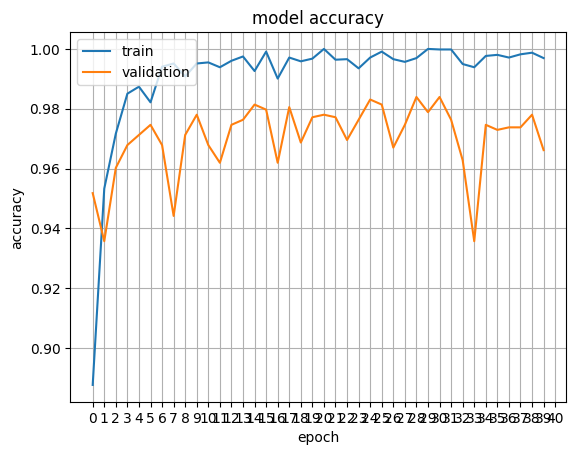

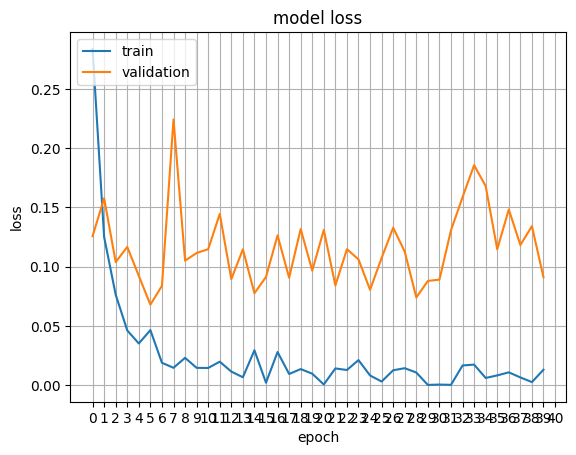

In [10]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

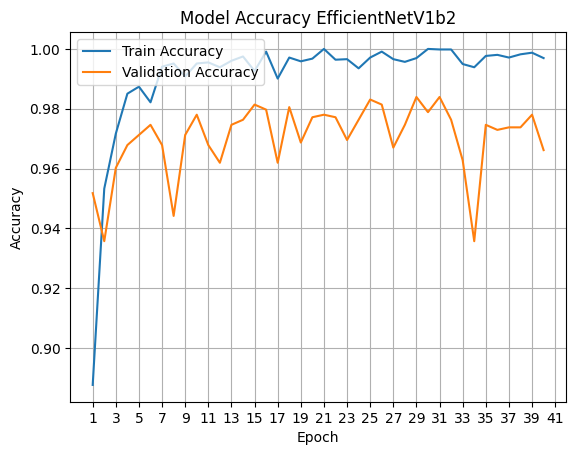

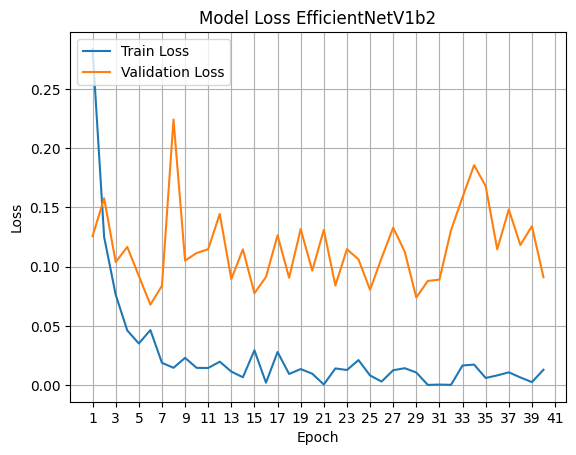

In [3]:
hist={'loss': [0.2837204039096832, 0.1250377595424652, 0.07629374414682388, 0.046184904873371124, 0.03516589477658272, 0.046468496322631836, 0.01887611486017704, 0.0146669652312994, 0.02305492013692856, 0.014604030176997185, 0.014510774053633213, 0.01982038840651512, 0.011464470066130161, 0.006673775147646666, 0.029440071433782578, 0.0020769713446497917, 0.02797650173306465, 0.009448705241084099, 0.013572799041867256, 0.00966458860784769, 0.000577917555347085, 0.01411468256264925, 0.01278893556445837, 0.021154707297682762, 0.008183598518371582, 0.003065186319872737, 0.012583600357174873, 0.014312248677015305, 0.010675990022718906, 0.00020554005459416658, 0.0005086310557089746, 0.00025876733707264066, 0.016624480485916138, 0.01734435185790062, 0.006076972931623459, 0.008235306479036808, 0.010831951163709164, 0.006536866072565317, 0.0025824590120464563, 0.013032807037234306], 'accuracy': [0.8876465559005737, 0.9532912373542786, 0.9716861844062805, 0.9850315451622009, 0.9873760342597961, 0.9821460843086243, 0.9940487146377563, 0.9951307773590088, 0.990802526473999, 0.9951307773590088, 0.9954914450645447, 0.993868350982666, 0.9960324764251709, 0.9974752068519592, 0.9926059246063232, 0.9990983009338379, 0.9900811314582825, 0.9971145391464233, 0.9958521127700806, 0.9967538118362427, 1.0, 0.9963931441307068, 0.9965735077857971, 0.9935076832771301, 0.9971145391464233, 0.9990983009338379, 0.9965735077857971, 0.9956717491149902, 0.996934175491333, 1.0, 0.9998196363449097, 0.9998196363449097, 0.9949504137039185, 0.993868350982666, 0.9976555705070496, 0.9980162382125854, 0.9971145391464233, 0.9981966018676758, 0.9987375736236572, 0.996934175491333], 'val_loss': [0.12575334310531616, 0.15771569311618805, 0.10382101684808731, 0.116675466299057, 0.09221719205379486, 0.06793933361768723, 0.08382949978113174, 0.22417289018630981, 0.10506656020879745, 0.1115211546421051, 0.1147315725684166, 0.14451992511749268, 0.08943338692188263, 0.11460970342159271, 0.0775437206029892, 0.09131549298763275, 0.12642166018486023, 0.09063422679901123, 0.13171760737895966, 0.09663082659244537, 0.1310020238161087, 0.0841037705540657, 0.11474140733480453, 0.10612042993307114, 0.08045975863933563, 0.1073194369673729, 0.13290904462337494, 0.11261789500713348, 0.07400062680244446, 0.08795980364084244, 0.08904027193784714, 0.13069310784339905, 0.15860150754451752, 0.1856418401002884, 0.1679876744747162, 0.11463563144207001, 0.14825521409511566, 0.11826186627149582, 0.13415271043777466, 0.09103449434041977], 'val_accuracy': [0.9517766237258911, 0.9357022047042847, 0.9602369070053101, 0.9678511023521423, 0.9712352156639099, 0.9746192693710327, 0.9678511023521423, 0.9441624283790588, 0.9712352156639099, 0.9780033826828003, 0.9678511023521423, 0.9619289636611938, 0.9746192693710327, 0.9763113260269165, 0.9813874959945679, 0.9796954393386841, 0.9619289636611938, 0.980541467666626, 0.9686971306800842, 0.9771573543548584, 0.9780033826828003, 0.9771573543548584, 0.9695431590080261, 0.9763113260269165, 0.9830795526504517, 0.9813874959945679, 0.9670050740242004, 0.9746192693710327, 0.9839255213737488, 0.9788494110107422, 0.9839255213737488, 0.9763113260269165, 0.962774932384491, 0.9357022047042847, 0.9746192693710327, 0.9729272127151489, 0.9737732410430908, 0.9737732410430908, 0.9780033826828003, 0.9661590456962585]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV1b2')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV1b2')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [11]:
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b2best.h5')
a=model1.evaluate(x=test_ds)
a=model1.evaluate (x=val_ds)

37/37 [==============================] - 3s 76ms/step - loss: 0.0740 - accuracy: 0.9839


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB3

from tensorflow.python.client import device_lib

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
print(device_lib.list_local_devices())
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
image_size = (300, 300)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)

img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)
IMG_SIZE=300
NUM_CLASSES=2

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = img_augmentation(inputs)
    model = EfficientNetB3(include_top=False, input_tensor=x, weights="imagenet")

    model.trainable = False


    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)


    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3708415912965094798
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3048525577343799610
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                 

                                                                                                  
 block1b_drop (Dropout)         (None, 150, 150, 24  0           ['block1b_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block1b_add (Add)              (None, 150, 150, 24  0           ['block1b_drop[0][0]',           
                                )                                 'block1a_project_bn[0][0]']     
                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 150, 150, 14  3456        ['block1b_add[0][0]']            
                                4)                                                                
                                                                                                  
 block2a_e

                                                                                                  
 block2c_expand_conv (Conv2D)   (None, 75, 75, 192)  6144        ['block2b_add[0][0]']            
                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 75, 75, 192)  768        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 75, 75, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 75, 75, 192)  1728       ['block2c_expand_activation[0][0]
 D)       

 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 38, 38, 288)  7200       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 38, 38, 288)  1152       ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 38, 38, 288)  0          ['block3b_bn[0][0]']             
 )                                                                                                
          

 block4a_dwconv (DepthwiseConv2  (None, 19, 19, 288)  2592       ['block4a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 19, 19, 288)  1152       ['block4a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 19, 19, 288)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 288)         0           ['block4a_activation[0][0]']     
 agePoolin

 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 576)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 24)     13848       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 576)    14400       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 19, 19, 576)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
          

                                                                                                  
 block4e_se_expand (Conv2D)     (None, 1, 1, 576)    14400       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 19, 19, 576)  0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
                                                                                                  
 block4e_project_conv (Conv2D)  (None, 19, 19, 96)   55296       ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 19, 19, 96)  384         ['block4e_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block5b_drop (Dropout)         (None, 19, 19, 136)  0           ['block5b_project_bn[0][0]']     
                                                                                                  
 block5b_add (Add)              (None, 19, 19, 136)  0           ['block5b_drop[0][0]',           
                                                                  'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, 19, 19, 816)  110976      ['block5b_add[0][0]']            
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 19, 19, 816)  3264       ['block5c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5e_expand_conv (Conv2D)   (None, 19, 19, 816)  110976      ['block5d_add[0][0]']            
                                                                                                  
 block5e_expand_bn (BatchNormal  (None, 19, 19, 816)  3264       ['block5e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5e_expand_activation (Act  (None, 19, 19, 816)  0          ['block5e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5e_dwconv (DepthwiseConv2  (None, 19, 19, 816)  20400      ['block5e_expand_activation[0][0]
 D)       

 block6b_expand_activation (Act  (None, 10, 10, 1392  0          ['block6b_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 10, 10, 1392  34800      ['block6b_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 10, 10, 1392  5568       ['block6b_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6b_activation (Activation  (None, 10, 10, 1392  0          ['block6b_bn[0][0]']             
 )        

 block6d_dwconv (DepthwiseConv2  (None, 10, 10, 1392  34800      ['block6d_expand_activation[0][0]
 D)                             )                                ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 10, 10, 1392  5568       ['block6d_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6d_activation (Activation  (None, 10, 10, 1392  0          ['block6d_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1392)        0           ['block6d_activation[0][0]']     
 agePoolin

 block6f_bn (BatchNormalization  (None, 10, 10, 1392  5568       ['block6f_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6f_activation (Activation  (None, 10, 10, 1392  0          ['block6f_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6f_se_squeeze (GlobalAver  (None, 1392)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6f_se_squeeze[0][0]']     
          

                                                                                                  
 block7b_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block7b_se_squeeze[0][0]']     
                                                                                                  
 block7b_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block7b_se_reshape[0][0]']     
                                                                                                  
 block7b_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block7b_se_reduce[0][0]']      
                                                                                                  
 block7b_se_excite (Multiply)   (None, 10, 10, 2304  0           ['block7b_activation[0][0]',     
                                )                                 'block7b_se_expand[0][0]']      
                                                                                                  
 block7b_p

In [13]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
tf.keras.optimizers.Adam(learning_rate=1e-4),
tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 300, 300, 3)  0           ['input_3[0][0]']                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 300, 300, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_2 (Normalization  (None, 300, 300, 3)  7          ['rescaling_2[0][0]'] 

                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 150, 150, 14  3456        ['block1b_add[0][0]']            
                                4)                                                                
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 150, 150, 14  576        ['block2a_expand_conv[0][0]']    
 ization)                       4)                                                                
                                                                                                  
 block2a_expand_activation (Act  (None, 150, 150, 14  0          ['block2a_expand_bn[0][0]']      
 ivation)                       4)                                                                
                                                                                                  
 block2a_d

 block2c_expand_activation (Act  (None, 75, 75, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 75, 75, 192)  1728       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_bn (BatchNormalization  (None, 75, 75, 192)  768        ['block2c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2c_activation (Activation  (None, 75, 75, 192)  0          ['block2c_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 38, 38, 288)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 288)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_s

 block4a_activation (Activation  (None, 19, 19, 288)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 288)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_s

 block4c_se_expand (Conv2D)     (None, 1, 1, 576)    14400       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 19, 19, 576)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 19, 19, 96)   55296       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 19, 19, 96)  384         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_d

 block4e_project_conv (Conv2D)  (None, 19, 19, 96)   55296       ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 19, 19, 96)  384         ['block4e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4e_drop (Dropout)         (None, 19, 19, 96)   0           ['block4e_project_bn[0][0]']     
                                                                                                  
 block4e_add (Add)              (None, 19, 19, 96)   0           ['block4e_drop[0][0]',           
                                                                  'block4d_add[0][0]']            
                                                                                                  
 block5a_e

 block5c_expand_conv (Conv2D)   (None, 19, 19, 816)  110976      ['block5b_add[0][0]']            
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 19, 19, 816)  3264       ['block5c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5c_expand_activation (Act  (None, 19, 19, 816)  0          ['block5c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5c_dwconv (DepthwiseConv2  (None, 19, 19, 816)  20400      ['block5c_expand_activation[0][0]
 D)                                                              ']                               
          

 block5e_expand_activation (Act  (None, 19, 19, 816)  0          ['block5e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5e_dwconv (DepthwiseConv2  (None, 19, 19, 816)  20400      ['block5e_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5e_bn (BatchNormalization  (None, 19, 19, 816)  3264       ['block5e_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5e_activation (Activation  (None, 19, 19, 816)  0          ['block5e_bn[0][0]']             
 )        

 block6b_bn (BatchNormalization  (None, 10, 10, 1392  5568       ['block6b_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block6b_activation (Activation  (None, 10, 10, 1392  0          ['block6b_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1392)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6b_se_squeeze[0][0]']     
          

 block6d_activation (Activation  (None, 10, 10, 1392  0          ['block6d_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1392)        0           ['block6d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_s

 block6f_se_squeeze (GlobalAver  (None, 1392)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6f_se_squeeze[0][0]']     
                                                                                                  
 block6f_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6f_se_reshape[0][0]']     
                                                                                                  
 block6f_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_se_excite (Multiply)   (None, 10, 10, 1392  0           ['block6f_activation[0][0]',     
          

                                                                                                  
 block7b_se_excite (Multiply)   (None, 10, 10, 2304  0           ['block7b_activation[0][0]',     
                                )                                 'block7b_se_expand[0][0]']      
                                                                                                  
 block7b_project_conv (Conv2D)  (None, 10, 10, 384)  884736      ['block7b_se_excite[0][0]']      
                                                                                                  
 block7b_project_bn (BatchNorma  (None, 10, 10, 384)  1536       ['block7b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 10, 10, 384)  0           ['block7b_project_bn[0][0]']     
          

In [14]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b3best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]


hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 100s 405ms/step - loss: 0.3014 - accuracy: 0.8786 - val_loss: 0.1681 - val_accuracy: 0.9391
Epoch 2/40
174/174 [==============================] - 64s 365ms/step - loss: 0.1576 - accuracy: 0.9381 - val_loss: 0.1043 - val_accuracy: 0.9526
Epoch 3/40
174/174 [==============================] - 64s 365ms/step - loss: 0.1217 - accuracy: 0.9592 - val_loss: 0.1440 - val_accuracy: 0.9594
Epoch 4/40
174/174 [==============================] - 64s 363ms/step - loss: 0.0993 - accuracy: 0.9668 - val_loss: 0.0893 - val_accuracy: 0.9662
Epoch 5/40
174/174 [==============================] - 64s 363ms/step - loss: 0.0850 - accuracy: 0.9690 - val_loss: 0.0658 - val_accuracy: 0.9755
Epoch 6/40
174/174 [==============================] - 62s 354ms/step - loss: 0.0739 - accuracy: 0.9748 - val_loss: 0.0735 - val_accuracy: 0.9738
Epoch 7/40
174/174 [==============================] - 62s 356ms/step - loss: 0.0586 - accuracy: 0.9785 - val_loss: 0.1023 - val_a

{'loss': [0.3014223873615265, 0.15757940709590912, 0.12173786014318466, 0.09934273362159729, 0.08495794981718063, 0.07385557144880295, 0.05856744945049286, 0.04599073901772499, 0.04552373290061951, 0.041207991540431976, 0.03614836931228638, 0.035509977489709854, 0.032777220010757446, 0.035586994141340256, 0.026737039908766747, 0.028506284579634666, 0.02670123241841793, 0.03628040477633476, 0.03161543607711792, 0.022281717509031296, 0.016237815842032433, 0.01568586938083172, 0.03990720212459564, 0.0269988514482975, 0.02065712958574295, 0.0266015212982893, 0.012474682182073593, 0.014806821011006832, 0.021030856296420097, 0.020229097455739975, 0.024817923083901405, 0.018705492839217186, 0.018364902585744858, 0.008076466619968414, 0.015945637598633766, 0.013480090536177158, 0.023655198514461517, 0.032194096595048904, 0.018918246030807495, 0.012778472155332565], 'accuracy': [0.8786293864250183, 0.9381424784660339, 0.959242582321167, 0.9668169617652893, 0.9689810872077942, 0.9747520089149475

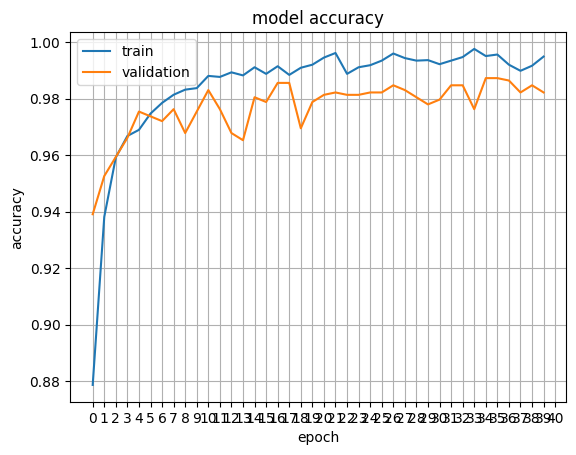

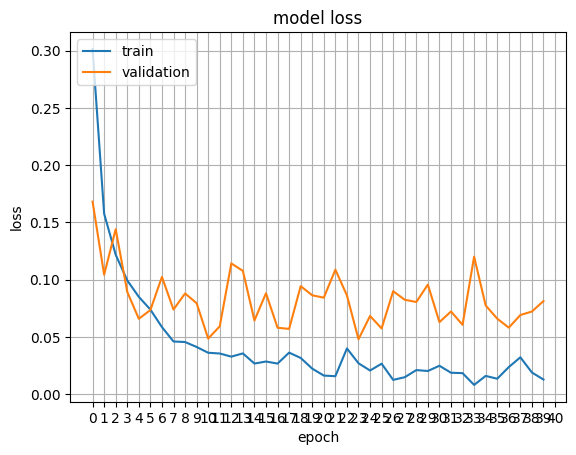

In [15]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

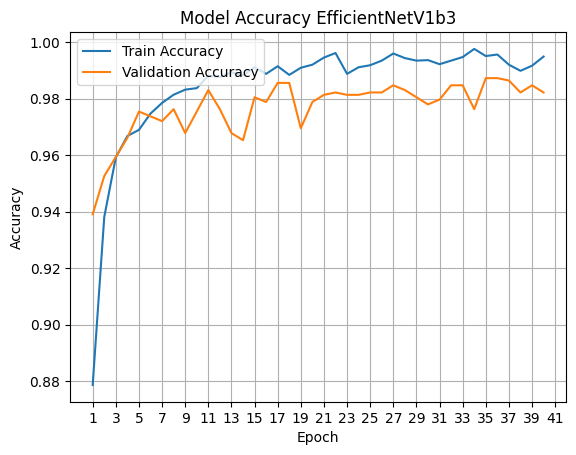

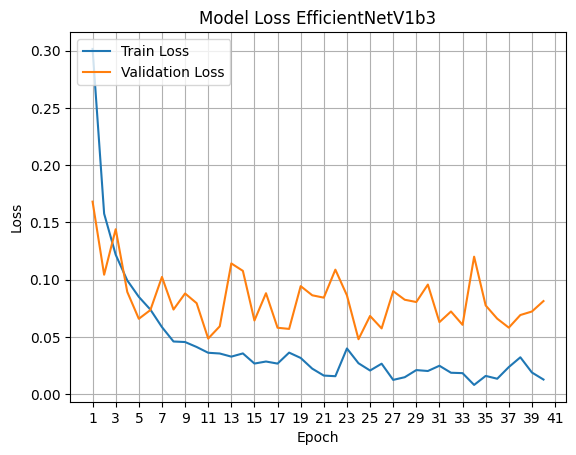

In [4]:
hist={'loss': [0.3014223873615265, 0.15757940709590912, 0.12173786014318466, 0.09934273362159729, 0.08495794981718063, 0.07385557144880295, 0.05856744945049286, 0.04599073901772499, 0.04552373290061951, 0.041207991540431976, 0.03614836931228638, 0.035509977489709854, 0.032777220010757446, 0.035586994141340256, 0.026737039908766747, 0.028506284579634666, 0.02670123241841793, 0.03628040477633476, 0.03161543607711792, 0.022281717509031296, 0.016237815842032433, 0.01568586938083172, 0.03990720212459564, 0.0269988514482975, 0.02065712958574295, 0.0266015212982893, 0.012474682182073593, 0.014806821011006832, 0.021030856296420097, 0.020229097455739975, 0.024817923083901405, 0.018705492839217186, 0.018364902585744858, 0.008076466619968414, 0.015945637598633766, 0.013480090536177158, 0.023655198514461517, 0.032194096595048904, 0.018918246030807495, 0.012778472155332565], 'accuracy': [0.8786293864250183, 0.9381424784660339, 0.959242582321167, 0.9668169617652893, 0.9689810872077942, 0.9747520089149475, 0.978539228439331, 0.9814246892929077, 0.9832281470298767, 0.9837691783905029, 0.9880973696708679, 0.987736701965332, 0.9893597960472107, 0.9882777333259583, 0.9911631941795349, 0.9888187646865845, 0.9915239214897156, 0.9884580969810486, 0.9909828901290894, 0.9920649528503418, 0.9945897459983826, 0.9962127804756165, 0.9888187646865845, 0.9911631941795349, 0.9918845891952515, 0.9935076832771301, 0.9960324764251709, 0.9944093823432922, 0.9935076832771301, 0.9936879873275757, 0.9922452569007874, 0.9935076832771301, 0.9947700500488281, 0.9976555705070496, 0.9951307773590088, 0.9956717491149902, 0.9920649528503418, 0.9899008274078369, 0.9917042255401611, 0.9949504137039185], 'val_loss': [0.16810156404972076, 0.1042880043387413, 0.14402014017105103, 0.0893229991197586, 0.06581097096204758, 0.07345442473888397, 0.10234814137220383, 0.07388075441122055, 0.08792488276958466, 0.07943695783615112, 0.04855284467339516, 0.0592498704791069, 0.11414477974176407, 0.10765676200389862, 0.06432947516441345, 0.08813996613025665, 0.05798942595720291, 0.05698159709572792, 0.09432122111320496, 0.08633016794919968, 0.08426583558320999, 0.1087135374546051, 0.0862746611237526, 0.0479678176343441, 0.06827744841575623, 0.05741483345627785, 0.08991744369268417, 0.08244827389717102, 0.08045396208763123, 0.09568770229816437, 0.06290888786315918, 0.07218681275844574, 0.06053769588470459, 0.12005414813756943, 0.0774521753191948, 0.06589891761541367, 0.05808469280600548, 0.06909757107496262, 0.07217273861169815, 0.08128374069929123], 'val_accuracy': [0.9390863180160522, 0.952622652053833, 0.9593908786773682, 0.9661590456962585, 0.9754652976989746, 0.9737732410430908, 0.9720812439918518, 0.9763113260269165, 0.9678511023521423, 0.9754652976989746, 0.9830795526504517, 0.9763113260269165, 0.9678511023521423, 0.9653130173683167, 0.980541467666626, 0.9788494110107422, 0.9856175780296326, 0.9856175780296326, 0.9695431590080261, 0.9788494110107422, 0.9813874959945679, 0.9822335243225098, 0.9813874959945679, 0.9813874959945679, 0.9822335243225098, 0.9822335243225098, 0.9847715497016907, 0.9830795526504517, 0.980541467666626, 0.9780033826828003, 0.9796954393386841, 0.9847715497016907, 0.9847715497016907, 0.9763113260269165, 0.9873096346855164, 0.9873096346855164, 0.9864636063575745, 0.9822335243225098, 0.9847715497016907, 0.9822335243225098]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV1b3')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV1b3')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [16]:
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b3best.h5')
a=model1.evaluate(x=val_ds)
a=model1.evaluate(x=test_ds)

37/37 [==============================] - 5s 119ms/step - loss: 0.0504 - accuracy: 0.9907


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB4
print(device_lib.list_local_devices())
print(tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
image_size = (380, 380)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)



img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)
IMG_SIZE=380
NUM_CLASSES=2

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = img_augmentation(inputs)
    model = EfficientNetB4(include_top=False, input_tensor=x, weights="imagenet")
  
    model.trainable = False

  
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8807034987741407839
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14481234097399006281
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                

                                                                                                  
 block1b_drop (Dropout)         (None, 190, 190, 24  0           ['block1b_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block1b_add (Add)              (None, 190, 190, 24  0           ['block1b_drop[0][0]',           
                                )                                 'block1a_project_bn[0][0]']     
                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 190, 190, 14  3456        ['block1b_add[0][0]']            
                                4)                                                                
                                                                                                  
 block2a_e

                                                                                                  
 block2c_expand_conv (Conv2D)   (None, 95, 95, 192)  6144        ['block2b_add[0][0]']            
                                                                                                  
 block2c_expand_bn (BatchNormal  (None, 95, 95, 192)  768        ['block2c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2c_expand_activation (Act  (None, 95, 95, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 95, 95, 192)  1728       ['block2c_expand_activation[0][0]
 D)       

                                                                                                  
 block3a_expand_activation (Act  (None, 95, 95, 192)  0          ['block3a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3a_dwconv_pad (ZeroPaddin  (None, 99, 99, 192)  0          ['block3a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 48, 48, 192)  4800       ['block3a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block3a_b

 block3c_bn (BatchNormalization  (None, 48, 48, 336)  1344       ['block3c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3c_activation (Activation  (None, 48, 48, 336)  0          ['block3c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3c_se_squeeze (GlobalAver  (None, 336)         0           ['block3c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3c_se_reshape (Reshape)   (None, 1, 1, 336)    0           ['block3c_se_squeeze[0][0]']     
          

                                                                                                  
 block4a_activation (Activation  (None, 24, 24, 336)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 336)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 336)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 14)     4718        ['block4a_se_reshape[0][0]']     
          

                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 24, 24, 672)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 24, 24, 112)  75264       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 24, 24, 112)  448        ['block4c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block4e_project_conv (Conv2D)  (None, 24, 24, 112)  75264       ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 24, 24, 112)  448        ['block4e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4e_drop (Dropout)         (None, 24, 24, 112)  0           ['block4e_project_bn[0][0]']     
                                                                                                  
 block4e_add (Add)              (None, 24, 24, 112)  0           ['block4e_drop[0][0]',           
                                                                  'block4d_add[0][0]']            
          

                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 24, 24, 960)  153600      ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 24, 24, 960)  3840       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 24, 24, 960)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5b_dwconv (DepthwiseConv2  (None, 24, 24, 960)  24000      ['block5b_expand_activation[0][0]
 D)       

                                                                                                  
 block5d_expand_activation (Act  (None, 24, 24, 960)  0          ['block5d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5d_dwconv (DepthwiseConv2  (None, 24, 24, 960)  24000      ['block5d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5d_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5d_a

 D)                                                              ']                               
                                                                                                  
 block5f_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5f_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5f_activation (Activation  (None, 24, 24, 960)  0          ['block5f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5f_se_squeeze (GlobalAver  (None, 960)         0           ['block5f_activation[0][0]']     
 agePooling2D)                                                                                    
          

 )                              )                                                                 
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1632)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1632)   0           ['block6b_se_squeeze[0][0]']     
                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 68)     111044      ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_se_expand (Conv2D)     (None, 1, 1, 1632)   112608      ['block6b_se_reduce[0][0]']      
          

 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1632)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 68)     111044      ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_se_expand (Conv2D)     (None, 1, 1, 1632)   112608      ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, 12, 12, 1632  0           ['block6d_activation[0][0]',     
                                )                                 'block6d_se_expand[0][0]']      
          

                                                                                                  
 block6f_se_reduce (Conv2D)     (None, 1, 1, 68)     111044      ['block6f_se_reshape[0][0]']     
                                                                                                  
 block6f_se_expand (Conv2D)     (None, 1, 1, 1632)   112608      ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_se_excite (Multiply)   (None, 12, 12, 1632  0           ['block6f_activation[0][0]',     
                                )                                 'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, 12, 12, 272)  443904      ['block6f_se_excite[0][0]']      
                                                                                                  
 block6f_p

 block6h_se_expand (Conv2D)     (None, 1, 1, 1632)   112608      ['block6h_se_reduce[0][0]']      
                                                                                                  
 block6h_se_excite (Multiply)   (None, 12, 12, 1632  0           ['block6h_activation[0][0]',     
                                )                                 'block6h_se_expand[0][0]']      
                                                                                                  
 block6h_project_conv (Conv2D)  (None, 12, 12, 272)  443904      ['block6h_se_excite[0][0]']      
                                                                                                  
 block6h_project_bn (BatchNorma  (None, 12, 12, 272)  1088       ['block6h_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6h_d

 lization)                                                                                        
                                                                                                  
 block7b_drop (Dropout)         (None, 12, 12, 448)  0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_add (Add)              (None, 12, 12, 448)  0           ['block7b_drop[0][0]',           
                                                                  'block7a_project_bn[0][0]']     
                                                                                                  
 top_conv (Conv2D)              (None, 12, 12, 1792  802816      ['block7b_add[0][0]']            
                                )                                                                 
                                                                                                  
 top_bn (B

In [18]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 380, 380, 3)  0           ['input_4[0][0]']                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 380, 380, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_3 (Normalization  (None, 380, 380, 3)  7          ['rescaling_3[0][0]'] 

                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 190, 190, 14  3456        ['block1b_add[0][0]']            
                                4)                                                                
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 190, 190, 14  576        ['block2a_expand_conv[0][0]']    
 ization)                       4)                                                                
                                                                                                  
 block2a_expand_activation (Act  (None, 190, 190, 14  0          ['block2a_expand_bn[0][0]']      
 ivation)                       4)                                                                
                                                                                                  
 block2a_d

 block2c_expand_activation (Act  (None, 95, 95, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 95, 95, 192)  1728       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_bn (BatchNormalization  (None, 95, 95, 192)  768        ['block2c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2c_activation (Activation  (None, 95, 95, 192)  0          ['block2c_bn[0][0]']             
 )        

                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 48, 48, 192)  4800       ['block3a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block3a_bn (BatchNormalization  (None, 48, 48, 192)  768        ['block3a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3a_activation (Activation  (None, 48, 48, 192)  0          ['block3a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3a_s

 block3c_se_squeeze (GlobalAver  (None, 336)         0           ['block3c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3c_se_reshape (Reshape)   (None, 1, 1, 336)    0           ['block3c_se_squeeze[0][0]']     
                                                                                                  
 block3c_se_reduce (Conv2D)     (None, 1, 1, 14)     4718        ['block3c_se_reshape[0][0]']     
                                                                                                  
 block3c_se_expand (Conv2D)     (None, 1, 1, 336)    5040        ['block3c_se_reduce[0][0]']      
                                                                                                  
 block3c_se_excite (Multiply)   (None, 48, 48, 336)  0           ['block3c_activation[0][0]',     
          

                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 336)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 14)     4718        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 336)    5040        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 24, 24, 336)  0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_p

 block4c_project_conv (Conv2D)  (None, 24, 24, 112)  75264       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 24, 24, 112)  448        ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_drop (Dropout)         (None, 24, 24, 112)  0           ['block4c_project_bn[0][0]']     
                                                                                                  
 block4c_add (Add)              (None, 24, 24, 112)  0           ['block4c_drop[0][0]',           
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_e

 block4e_drop (Dropout)         (None, 24, 24, 112)  0           ['block4e_project_bn[0][0]']     
                                                                                                  
 block4e_add (Add)              (None, 24, 24, 112)  0           ['block4e_drop[0][0]',           
                                                                  'block4d_add[0][0]']            
                                                                                                  
 block4f_expand_conv (Conv2D)   (None, 24, 24, 672)  75264       ['block4e_add[0][0]']            
                                                                                                  
 block4f_expand_bn (BatchNormal  (None, 24, 24, 672)  2688       ['block4f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4f_e

 block5b_expand_activation (Act  (None, 24, 24, 960)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5b_dwconv (DepthwiseConv2  (None, 24, 24, 960)  24000      ['block5b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 24, 24, 960)  0          ['block5b_bn[0][0]']             
 )        

                                                                                                  
 block5d_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5d_activation (Activation  (None, 24, 24, 960)  0          ['block5d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 960)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_s

 )                                                                                                
                                                                                                  
 block5f_se_squeeze (GlobalAver  (None, 960)         0           ['block5f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5f_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5f_se_squeeze[0][0]']     
                                                                                                  
 block5f_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5f_se_reshape[0][0]']     
                                                                                                  
 block5f_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5f_se_reduce[0][0]']      
          

                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 68)     111044      ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_se_expand (Conv2D)     (None, 1, 1, 1632)   112608      ['block6b_se_reduce[0][0]']      
                                                                                                  
 block6b_se_excite (Multiply)   (None, 12, 12, 1632  0           ['block6b_activation[0][0]',     
                                )                                 'block6b_se_expand[0][0]']      
                                                                                                  
 block6b_project_conv (Conv2D)  (None, 12, 12, 272)  443904      ['block6b_se_excite[0][0]']      
                                                                                                  
 block6b_p

 block6d_se_expand (Conv2D)     (None, 1, 1, 1632)   112608      ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, 12, 12, 1632  0           ['block6d_activation[0][0]',     
                                )                                 'block6d_se_expand[0][0]']      
                                                                                                  
 block6d_project_conv (Conv2D)  (None, 12, 12, 272)  443904      ['block6d_se_excite[0][0]']      
                                                                                                  
 block6d_project_bn (BatchNorma  (None, 12, 12, 272)  1088       ['block6d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6d_d

                                )                                 'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, 12, 12, 272)  443904      ['block6f_se_excite[0][0]']      
                                                                                                  
 block6f_project_bn (BatchNorma  (None, 12, 12, 272)  1088       ['block6f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6f_drop (Dropout)         (None, 12, 12, 272)  0           ['block6f_project_bn[0][0]']     
                                                                                                  
 block6f_add (Add)              (None, 12, 12, 272)  0           ['block6f_drop[0][0]',           
          

                                                                                                  
 block6h_project_bn (BatchNorma  (None, 12, 12, 272)  1088       ['block6h_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6h_drop (Dropout)         (None, 12, 12, 272)  0           ['block6h_project_bn[0][0]']     
                                                                                                  
 block6h_add (Add)              (None, 12, 12, 272)  0           ['block6h_drop[0][0]',           
                                                                  'block6g_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 12, 12, 1632  443904      ['block6h_add[0][0]']            
          

                                                                                                  
 top_conv (Conv2D)              (None, 12, 12, 1792  802816      ['block7b_add[0][0]']            
                                )                                                                 
                                                                                                  
 top_bn (BatchNormalization)    (None, 12, 12, 1792  7168        ['top_conv[0][0]']               
                                )                                                                 
                                                                                                  
 top_activation (Activation)    (None, 12, 12, 1792  0           ['top_bn[0][0]']                 
                                )                                                                 
                                                                                                  
 avg_pool 

In [19]:
from tensorflow import keras
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b4best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]

hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 122s 535ms/step - loss: 0.2790 - accuracy: 0.8878 - val_loss: 0.1615 - val_accuracy: 0.9391
Epoch 2/40
174/174 [==============================] - 84s 483ms/step - loss: 0.1269 - accuracy: 0.9558 - val_loss: 0.0912 - val_accuracy: 0.9619
Epoch 3/40
174/174 [==============================] - 83s 477ms/step - loss: 0.0942 - accuracy: 0.9648 - val_loss: 0.0803 - val_accuracy: 0.9679
Epoch 4/40
174/174 [==============================] - 82s 470ms/step - loss: 0.0703 - accuracy: 0.9757 - val_loss: 0.0560 - val_accuracy: 0.9772
Epoch 5/40
174/174 [==============================] - 82s 469ms/step - loss: 0.0499 - accuracy: 0.9829 - val_loss: 0.0790 - val_accuracy: 0.9738
Epoch 6/40
174/174 [==============================] - 82s 471ms/step - loss: 0.0500 - accuracy: 0.9834 - val_loss: 0.0543 - val_accuracy: 0.9772
Epoch 7/40
174/174 [==============================] - 81s 463ms/step - loss: 0.0406 - accuracy: 0.9858 - val_loss: 0.1905 - val_a

{'loss': [0.27898579835891724, 0.12691223621368408, 0.09417401254177094, 0.07026737928390503, 0.049914490431547165, 0.049950458109378815, 0.04055395722389221, 0.04529440402984619, 0.02696870267391205, 0.030930759385228157, 0.022523481398820877, 0.025119805708527565, 0.030018124729394913, 0.016173597425222397, 0.023818645626306534, 0.01696854829788208, 0.019317271187901497, 0.01776866801083088, 0.015596713870763779, 0.02072090096771717, 0.01648855023086071, 0.018991146236658096, 0.01967099867761135, 0.009106514975428581, 0.013382337987422943, 0.009754752740263939, 0.010321514680981636, 0.014487341046333313, 0.014971322380006313, 0.012581480666995049, 0.011604932136833668, 0.019253239035606384, 0.00830832589417696, 0.018692748621106148, 0.04496946930885315, 0.02471028082072735, 0.005360280629247427, 0.010813773609697819, 0.013373092748224735, 0.012868378311395645], 'accuracy': [0.8878268599510193, 0.9558160305023193, 0.9648331999778748, 0.9756537675857544, 0.982867419719696, 0.9834084510

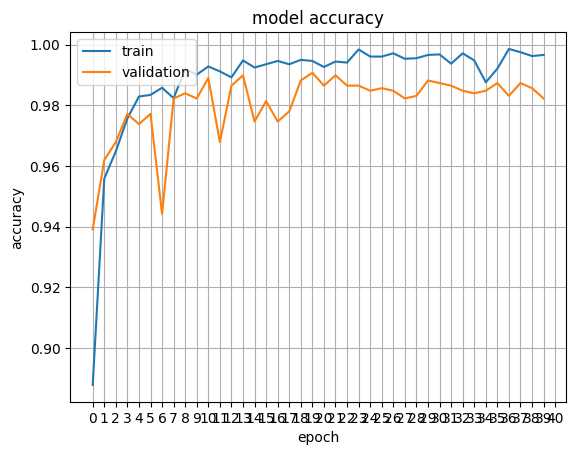

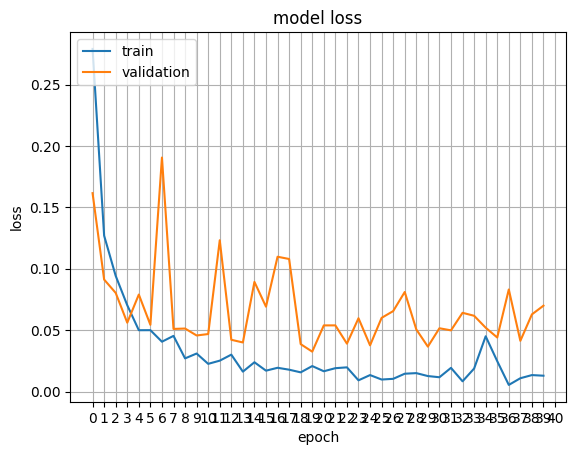

In [20]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

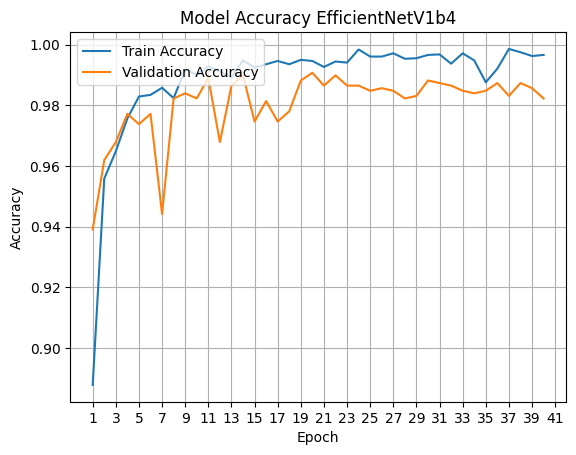

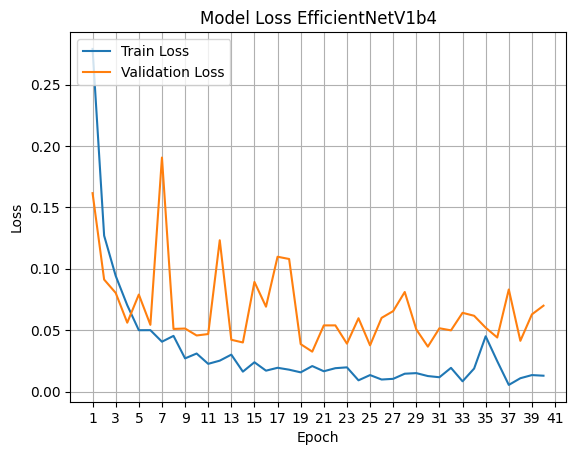

In [5]:
hist={'loss': [0.27898579835891724, 0.12691223621368408, 0.09417401254177094, 0.07026737928390503, 0.049914490431547165, 0.049950458109378815, 0.04055395722389221, 0.04529440402984619, 0.02696870267391205, 0.030930759385228157, 0.022523481398820877, 0.025119805708527565, 0.030018124729394913, 0.016173597425222397, 0.023818645626306534, 0.01696854829788208, 0.019317271187901497, 0.01776866801083088, 0.015596713870763779, 0.02072090096771717, 0.01648855023086071, 0.018991146236658096, 0.01967099867761135, 0.009106514975428581, 0.013382337987422943, 0.009754752740263939, 0.010321514680981636, 0.014487341046333313, 0.014971322380006313, 0.012581480666995049, 0.011604932136833668, 0.019253239035606384, 0.00830832589417696, 0.018692748621106148, 0.04496946930885315, 0.02471028082072735, 0.005360280629247427, 0.010813773609697819, 0.013373092748224735, 0.012868378311395645], 'accuracy': [0.8878268599510193, 0.9558160305023193, 0.9648331999778748, 0.9756537675857544, 0.982867419719696, 0.9834084510803223, 0.9857529401779175, 0.9823264479637146, 0.9918845891952515, 0.9900811314582825, 0.9927862882614136, 0.9911631941795349, 0.9891794323921204, 0.9947700500488281, 0.9924256205558777, 0.9935076832771301, 0.9945897459983826, 0.9935076832771301, 0.9949504137039185, 0.9945897459983826, 0.9926059246063232, 0.9944093823432922, 0.9940487146377563, 0.9983769059181213, 0.9960324764251709, 0.9960324764251709, 0.9971145391464233, 0.9953110814094543, 0.9954914450645447, 0.9965735077857971, 0.9967538118362427, 0.9936879873275757, 0.9971145391464233, 0.9947700500488281, 0.9875563383102417, 0.9920649528503418, 0.9985572695732117, 0.9974752068519592, 0.9962127804756165, 0.9965735077857971], 'val_loss': [0.16153092682361603, 0.09116435796022415, 0.08029450476169586, 0.05604282021522522, 0.07896111905574799, 0.05429762601852417, 0.19052591919898987, 0.050958096981048584, 0.051277149468660355, 0.04563137888908386, 0.04679242521524429, 0.1231757253408432, 0.042114149779081345, 0.03994002193212509, 0.0892549604177475, 0.06907347589731216, 0.10974425822496414, 0.10791967064142227, 0.03857019543647766, 0.032455924898386, 0.05383303761482239, 0.05384945869445801, 0.03897976502776146, 0.05966434255242348, 0.03758740425109863, 0.05997929349541664, 0.06547626852989197, 0.081045962870121, 0.05054008960723877, 0.036543261259794235, 0.05150409787893295, 0.04978920519351959, 0.06408964097499847, 0.06167095899581909, 0.05196857079863548, 0.04397058114409447, 0.08309760689735413, 0.04127081111073494, 0.06281827390193939, 0.06989409029483795], 'val_accuracy': [0.9390863180160522, 0.9619289636611938, 0.9678511023521423, 0.9771573543548584, 0.9737732410430908, 0.9771573543548584, 0.9441624283790588, 0.9822335243225098, 0.9839255213737488, 0.9822335243225098, 0.9890016913414001, 0.9678511023521423, 0.9864636063575745, 0.989847719669342, 0.9746192693710327, 0.9813874959945679, 0.9746192693710327, 0.9780033826828003, 0.9881556630134583, 0.9906937479972839, 0.9864636063575745, 0.989847719669342, 0.9864636063575745, 0.9864636063575745, 0.9847715497016907, 0.9856175780296326, 0.9847715497016907, 0.9822335243225098, 0.9830795526504517, 0.9881556630134583, 0.9873096346855164, 0.9864636063575745, 0.9847715497016907, 0.9839255213737488, 0.9847715497016907, 0.9873096346855164, 0.9830795526504517, 0.9873096346855164, 0.9856175780296326, 0.9822335243225098]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy EfficientNetV1b4')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss EfficientNetV1b4')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [21]:
import tensorflow_addons as tfa

from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b4best.h5')
a=model1.evaluate(
    x=val_ds
)
a=model1.evaluate(
    x=test_ds
)

37/37 [==============================] - 8s 208ms/step - loss: 0.0270 - accuracy: 0.9907


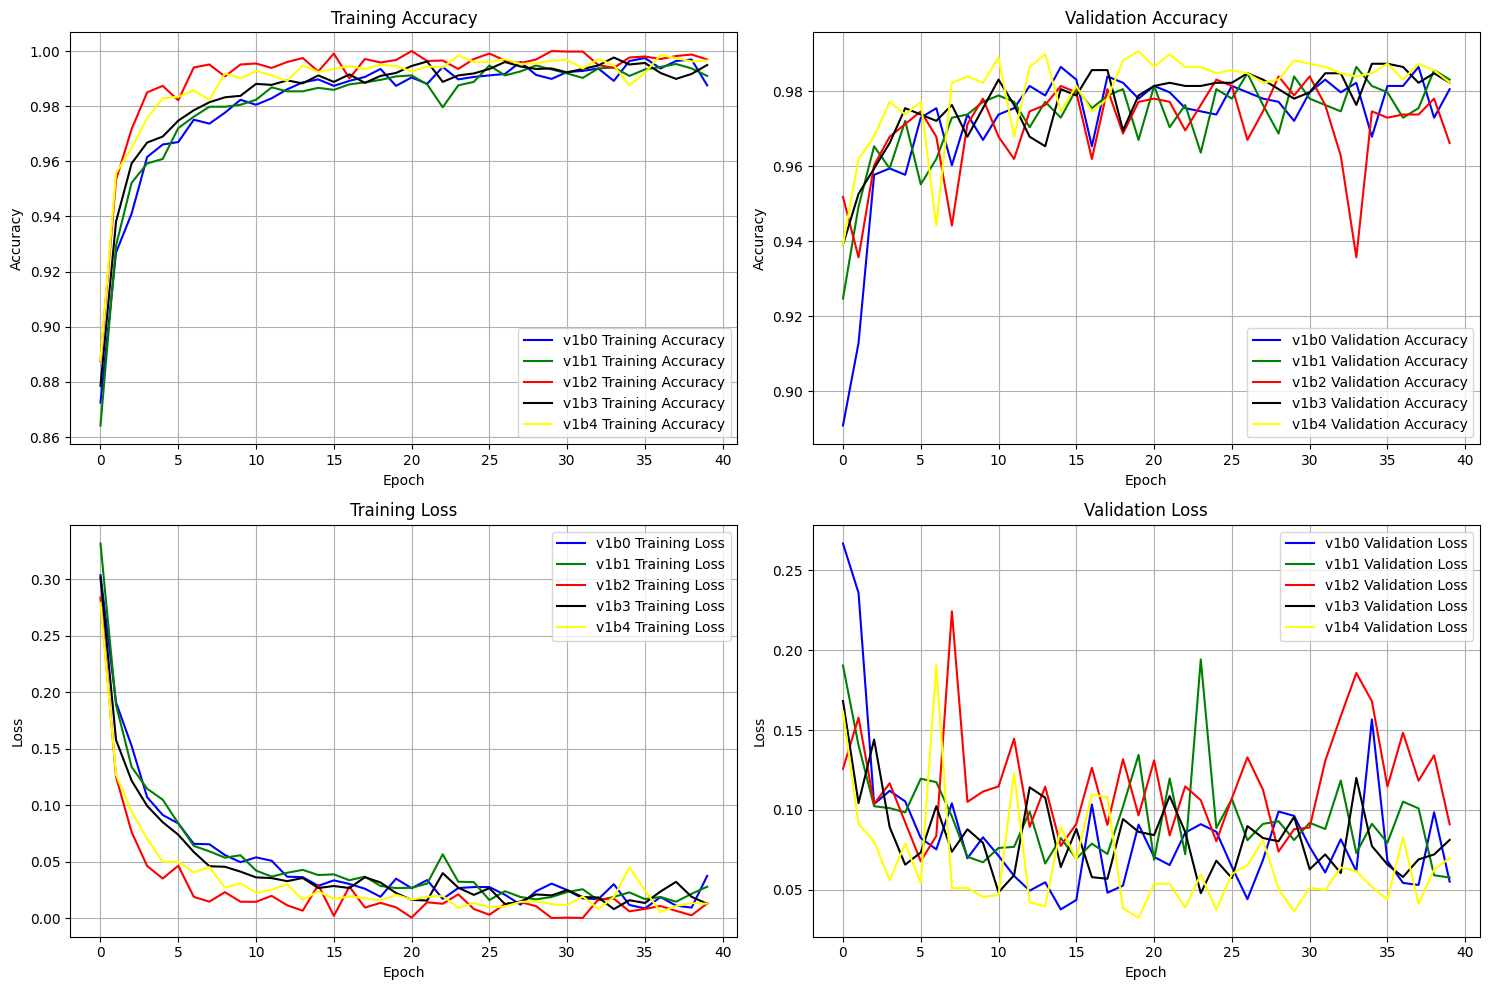

In [7]:
import matplotlib.pyplot as plt
histories = [histv1b0, histv1b1, histv1b2, histv1b3, histv1b4]
network_names = ['v1b0', 'v1b1', 'v1b2', 'v1b3', 'v1b4']
colors = ['b', 'g', 'r', 'black', 'yellow'] 

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
for i, hist in enumerate(histories):
    plt.plot(hist['accuracy'], label=f'{network_names[i]} Training Accuracy', color=colors[i], linestyle='-')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
for i, hist in enumerate(histories):
    plt.plot(hist['val_accuracy'], label=f'{network_names[i]} Validation Accuracy', color=colors[i], linestyle='-')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
for i, hist in enumerate(histories):
    plt.plot(hist['loss'], label=f'{network_names[i]} Training Loss', color=colors[i], linestyle='-')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
for i, hist in enumerate(histories):
    plt.plot(hist['val_loss'], label=f'{network_names[i]} Validation Loss', color=colors[i], linestyle='-')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()